# Analysis.ipynb   
### A project analysing the Iris dataset   
### Author: Paul O'Shaughnessy

***

## **1. Setup**

### 1.1 Firstly, the various libraries to be used are imported:

- ***Pandas*** is a Python Library used for cleaning, analyzing and manipulating data. More information can be found [here](https://pandas.pydata.org/docs/).   
    - Pandas Dataframe functionality will be used frequently. More information on Pandas Dataframes can be found [here](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html).   

- ***NumPy*** is a Python Library for working with arrays, linear algebra, and matrices. More information can be found [here](https://numpy.org/).
- ***Matplotlib*** is a comprehensive Python library for creating static, animated, and interactive visualizations in Python. More information can be found [here](https://matplotlib.org/).
- ***Seaborn*** is a Python data visualization library based on matplotlib. More information can be found [here](https://seaborn.pydata.org/).   
- ***Warnings*** is used to suppress unnecessary warnings. More information can be found [here](https://docs.python.org/3/library/warnings.html#temporarily-suppressing-warnings).

In [1]:
# Import Libraries to be used for analysis of dataset
import warnings
warnings.simplefilter(action='ignore', category=(FutureWarning, UserWarning))

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
from seaborn import pairplot

### 1.2 The Iris dataset is then imported:

In [2]:
# Import iris dataset from the csv file in this project folder.   
# Assign iris as the dataframe name.     
# Include header=None as there are no column titles on the csv file.
iris = pd.read_csv('iris.data', header=None)


### 1.3 No Column names were in the dataset so they need to get added:

In [3]:
# Assign Column titles to dataset
iris.columns = [
                'sepal_length_cm', 
                'sepal_width_cm', 
                'petal_length_cm', 
                'petal_width_cm', 
                'class'
                ]

### 1.4 Check that the Column names have been added as expected:

In [4]:
# Check Column titles have assigned. Use Pandas head() method.
iris.head(5)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 1.5 Check all 150 rows have imported and that there are no null values

In [5]:
# Use Pandas info() method.
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## **2. Summary Data**

***

### 2.1 The describe() method outputs summary data for each numerical variable:

In [6]:
# Generate summary data for the numerical variables for all species combined.
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### 2.1.1 To output the above data in a txt file, the code below is used:

In [7]:
# Assign a variable to the summary dataframe.
summary = iris.describe() 

# Export the summary dataframe as a txt file
summary.to_string('summary.txt')

### 2.2 Summary Data by Measurement Variable

#### *2.2.1 Sepal Length Summary Data*

In [8]:
# Generate summary data for sepal length for each species
iris.groupby(['class']).describe()['sepal_length_cm']

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
Iris-versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
Iris-virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


#### *2.2.2 Sepal Width Summary Data*

In [9]:
# Generate summary data for sepal width for each species
iris.groupby(['class']).describe()['sepal_width_cm']

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,50.0,3.418,0.381024,2.3,3.125,3.4,3.675,4.4
Iris-versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
Iris-virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


#### *2.2.3 Petal Length Summary Data*

In [10]:
# Generate summary data for petal length for each species
iris.groupby(['class']).describe()['petal_length_cm']

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,50.0,1.464,0.173511,1.0,1.4,1.50,1.575,1.9
Iris-versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
Iris-virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


#### *2.2.4 Petal Width Summary Data*

In [11]:
# Generate summary data for petal width for each species
iris.groupby(['class']).describe()['petal_width_cm']

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,50.0,0.244,0.107210,0.1,0.2,0.2,0.3,0.6
Iris-versicolor,50.0,1.326,0.197753,1.0,1.2,1.3,1.5,1.8
Iris-virginica,50.0,2.026,0.274650,1.4,1.8,2.0,2.3,2.5


### 2.3 Summary Data by Species

#### *2.3.1 Iris Setosa Summary Data*

In [12]:
# Generate summary data specific to Iris-setosa only.
setosa = iris[iris['class'] == 'Iris-setosa'] 
setosa.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


#### *2.3.2 Iris Versicolor Summary Data*

In [13]:
# Generate summary data specific to Iris-versicolor only.
vers = iris[iris['class'] == 'Iris-versicolor'] 
vers.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


#### 2.3.3 Iris Virginica Summary Data

In [14]:
# Generate summary data specific to Iris-virginica only. 
virg = iris[iris['class'] == 'Iris-virginica'] 
virg.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


### 2.4 Plot averages of measurement variables for each species

[Text(0.5, 1.0, 'Average Petal Width')]

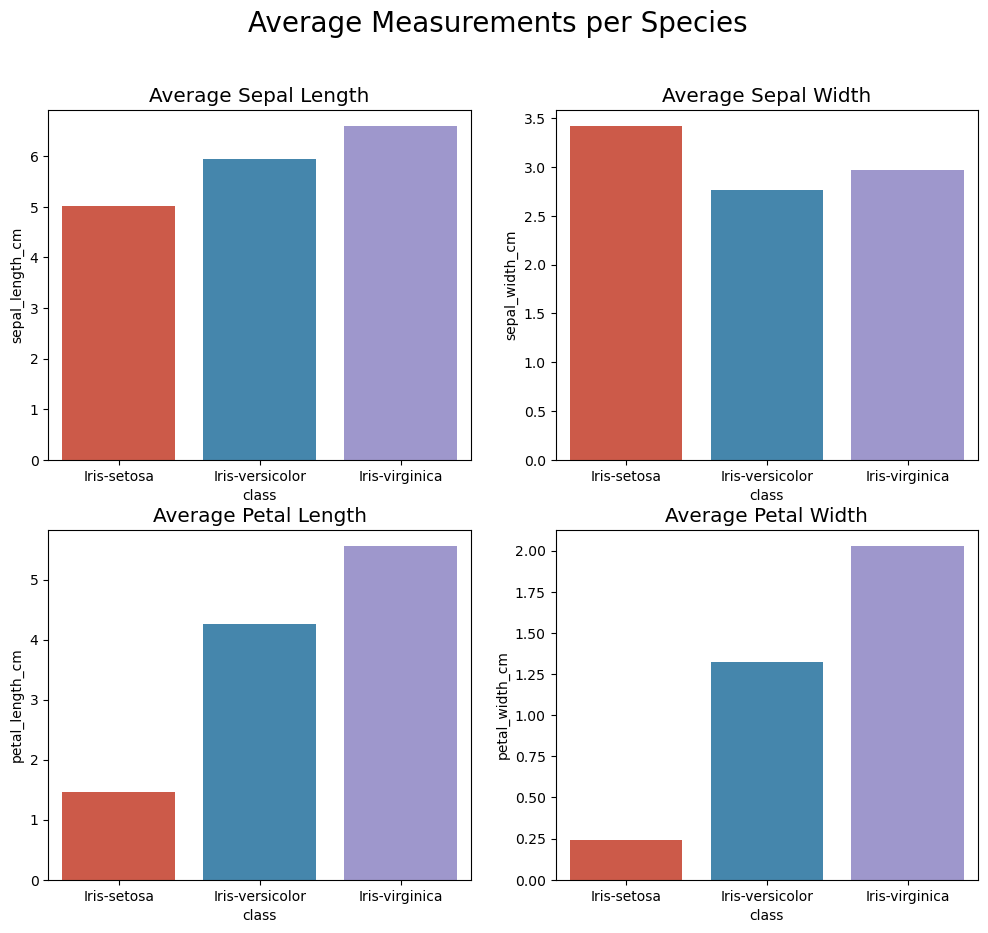

In [15]:
# Set up the structure of the figure and number of axes.
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Average Measurements per Species', fontsize=20)
plt.style.use('ggplot')

# Setup the variable to be plotted and analysed in each axes.
sns.barplot(data=iris, x='class', y='sepal_length_cm', ax=axes[0, 0], errorbar=None).set(title='Average Sepal Length')
sns.barplot(data=iris, x='class', y='sepal_width_cm', ax=axes[0, 1], errorbar=None).set(title='Average Sepal Width')
sns.barplot(data=iris, x='class', y='petal_length_cm', ax=axes[1, 0], errorbar=None).set(title='Average Petal Length')
sns.barplot(data=iris, x='class', y='petal_width_cm', ax=axes[1, 1], errorbar=None).set(title='Average Petal Width')

### 2.5 Interpretation of Summary Data and Averages

- When the summary data is generated at a combined level, the standard deviation is higher than that of the same summary data generated at the individual species level. This reflects what would be expected when dealing with species with different measuremants.
- Iris Virginica is the largest species on average in three of the four measurement categories, with the exception of sepal width.
- Iris Setosa is the smallest species on average in three of the four measurement categories, with the exception of sepal width, where it is the largest.  
- Iris Setosa having the largest sepal width, whereas being the smallest species across the three other measurement variables, seems odd and warrants further investigation which is contained in the next section.

### 2.6 Setosa Sepal Width Investigation

#### 2.6.1 Standard Deviation

In [16]:
# Standard Deviation of Setosa Sepal Widths

# Create a dataframe with Setosa data only.
seto = iris[iris['class'] == 'Iris-setosa']
# Generate the standard deviation for the sepal width column only. 
sd = seto['sepal_width_cm'].std()
# Round the figure to 5 decimal places.
round(sd, 5)

0.38102

- Per the above, the Standard Deviation of the Setosa sepal widths is 0.38102. This means none of the values deviate more or less than 0.38102 centimetres from the mean of 3.418 centimetres, which suggests there are no outliers skewing the mean of the sepal width values for the Setosa species.

#### 2.6.2 Boxplot to identify any outliers

- Per the pandas webpage for boxplots, located [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.box.html), "a box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of box to show the range of the data. The position of the whiskers is set by default to 1.5*IQR (IQR = Q3 - Q1) from the edges of the box. Outlier points are those past the end of the whiskers."

<Axes: >

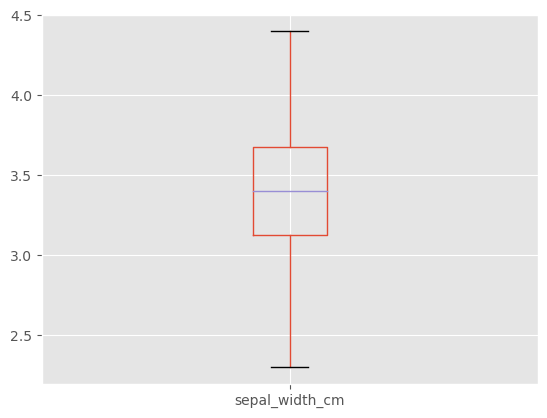

In [17]:
# Boxplot for Setosa sepal widths.

# Create a dataframe with Setosa data only.
seto = iris[iris['class'] == 'Iris-setosa']
# Generate a boxplot for the sepal width column only
seto.boxplot(['sepal_width_cm'])

- As inferred from the Standard Deviation calculation in 2.6.1, the boxplot analysis above is not showing any sepal width values that could be considered outliers. 
- Therefore it is safe to assume the values for the Iris Setosa sepal widths are legitimate, are not being skewed, and that there is no error with Iris Setosa having the largest sepal widths on average, despite being the smallest species for all other measurements. 

## **3. Histograms**   

***

Histograms can be used to plot the distributions of the measurement variables in the dataset.
Seaborn's histplot functionality will be used. More information on Seaborn histplot can be found [here](https://seaborn.pydata.org/generated/seaborn.histplot.html)

### 3.1 Histograms - All Species Combined 

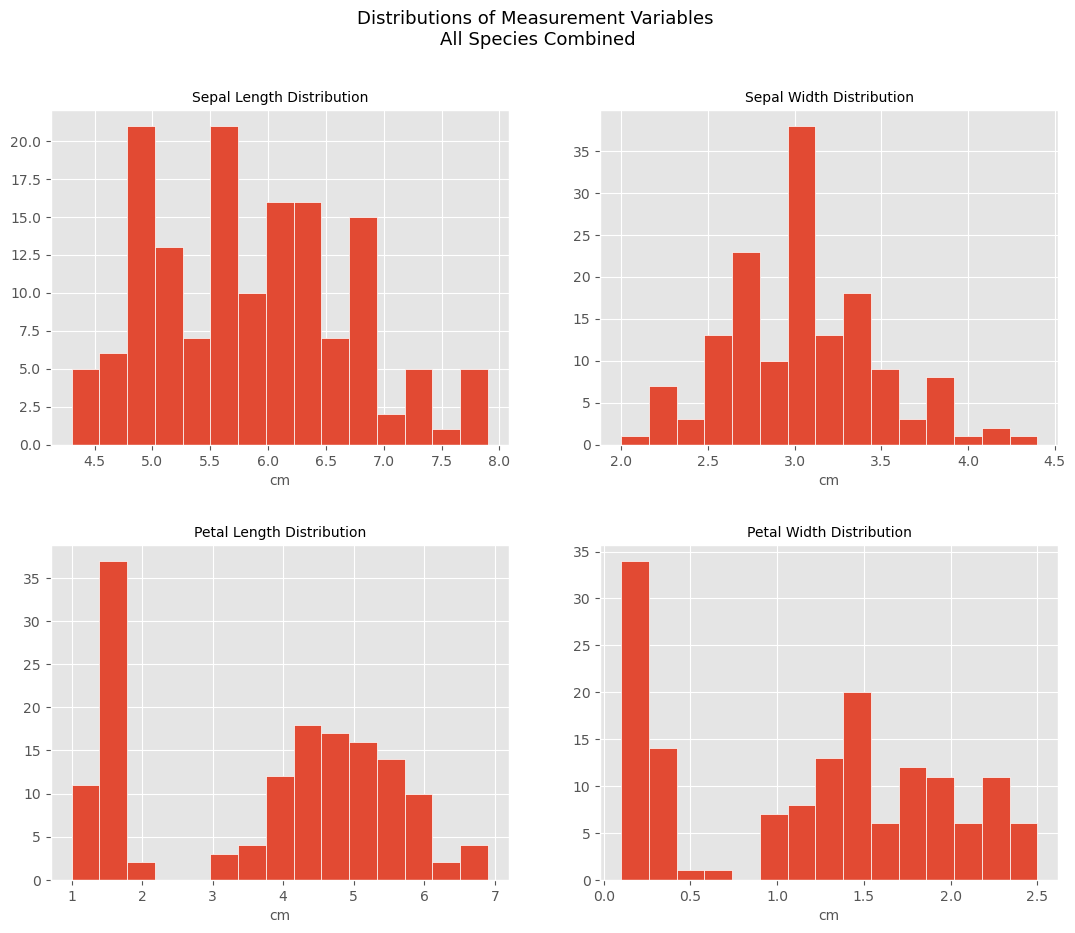

In [18]:

# Assign variables to each of the dataset measurement variables
sepal_l = iris['sepal_length_cm']
sepal_w = iris['sepal_width_cm']
petal_l = iris['petal_length_cm']
petal_w = iris['petal_width_cm']

# Use matplotlib to plot and style the figure that will house the histogram axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 10))
plt.style.use('ggplot')
plt.subplots_adjust(hspace=.3)

# Generate, format, and title the histogram axes for each measurement variable
axes[0, 0].hist(sepal_l, edgecolor='white', bins=15)
axes[0, 0].set_title('Sepal Length Distribution', fontsize=10)
axes[0, 0].set_xlabel('cm', fontsize=10)

axes[0, 1].hist(sepal_w, edgecolor='white', bins=15)
axes[0, 1].set_title('Sepal Width Distribution', fontsize=10)
axes[0, 1].set_xlabel('cm', fontsize=10)

axes[1, 0].hist(petal_l, edgecolor='white', bins=15)
axes[1, 0].set_title('Petal Length Distribution', fontsize=10)
axes[1, 0].set_xlabel('cm', fontsize=10)

axes[1, 1].hist(petal_w, edgecolor='white', bins=15)
axes[1, 1].set_title('Petal Width Distribution', fontsize=10)
axes[1, 1].set_xlabel('cm', fontsize=10)

# Generate a title for the overall figure
fig.suptitle('Distributions of Measurement Variables \nAll Species Combined', fontsize=13)
# Save a copy of the histograms as a png file
plt.savefig('histogram.png')

#### 3.1.2 What can be inferred from the Combined Histograms?

- Histograms are used to show frequency distributions and to see the shape of the data's distribution.   
- Some typical histogram shapes are Normal Distribution, Skewed Distribution, Bimodal Distribution, Multimodal Distributions. Details of distributions can be viewed [here](https://www.knowledgehut.com/blog/data-science/probability-distribution-types#types-of-the-discrete-probability-distribution-%E2%80%93%C2%A0).
- As the above histograms are capturing the frequency distributions of different species, they could be described as multimodal distributions.   
- In the examples above, the "Combined" histograms have more than one peak.
- This can be further illustrated by adding a Kernel Density Estimate Plot to each of the "Combined" histograms. 

#### 3.1.3 Add a Kernel Density Estimate (KDE) Plot to the Combined Histograms

- Here is the [link](https://en.wikipedia.org/wiki/Kernel_density_estimation) to the Wikipedia explanation of the KDE.
- It basically explains that a KDE gives a smooth curve representing where the data is clustered or most dense.

[Text(0.5, 1.0, 'Petal Widths')]

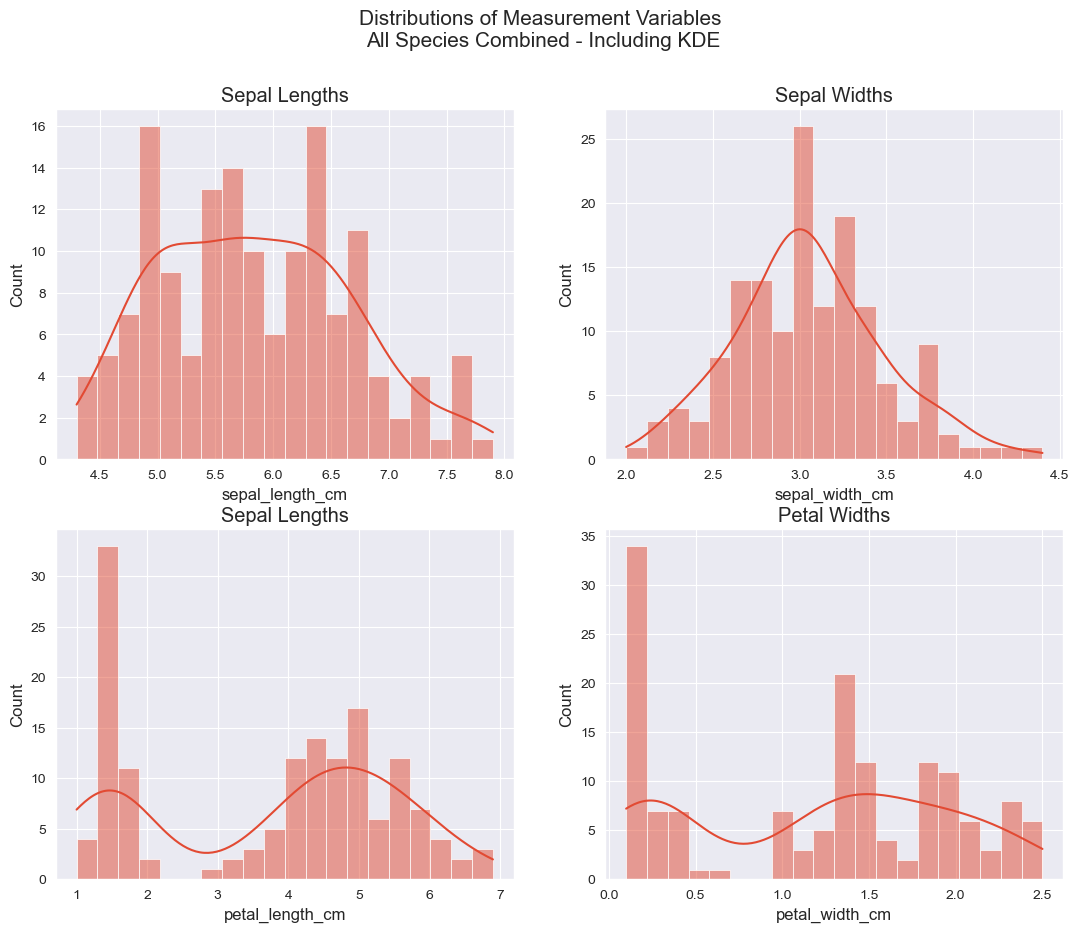

In [19]:
# Setup the structure of the figure and number of axes.
sns.set_style('darkgrid')
fig, axes = plt.subplots(2, 2, figsize=(13, 10))
fig.suptitle('Distributions of Measurement Variables \nAll Species Combined - Including KDE', fontsize=15)

# Setup the variables to be plotted and analysed in each axes. Use kde=True to add the Kernel Density Estimate
sns.histplot(ax=axes[0, 0], data=iris, x='sepal_length_cm', bins=20, kde=True).set(title='Sepal Lengths')
sns.histplot(ax=axes[0, 1], data=iris, x='sepal_width_cm', bins=20, kde=True).set(title='Sepal Widths')
sns.histplot(ax=axes[1, 0], data=iris, x='petal_length_cm', bins=20, kde=True).set(title='Sepal Lengths')
sns.histplot(ax=axes[1, 1], data=iris, x='petal_width_cm', bins=20, kde=True).set(title='Petal Widths')

#### 3.1.4 What can be inferred from the KDE plots?

- With the exception of Sepal Width, which appears to be a Normal Distribution, none of the other variables have a definable distribution type.   
- As the three different species are combined in these plots, that is not surprising.   
- It would be useful to analyse each species on its own to see if the distribution types are more definable.

### 3.2 Histograms by Species

#### 3.2.1 Iris Setosa Distributions

Text(0.5, 0.98, 'Iris Setosa Distributions')

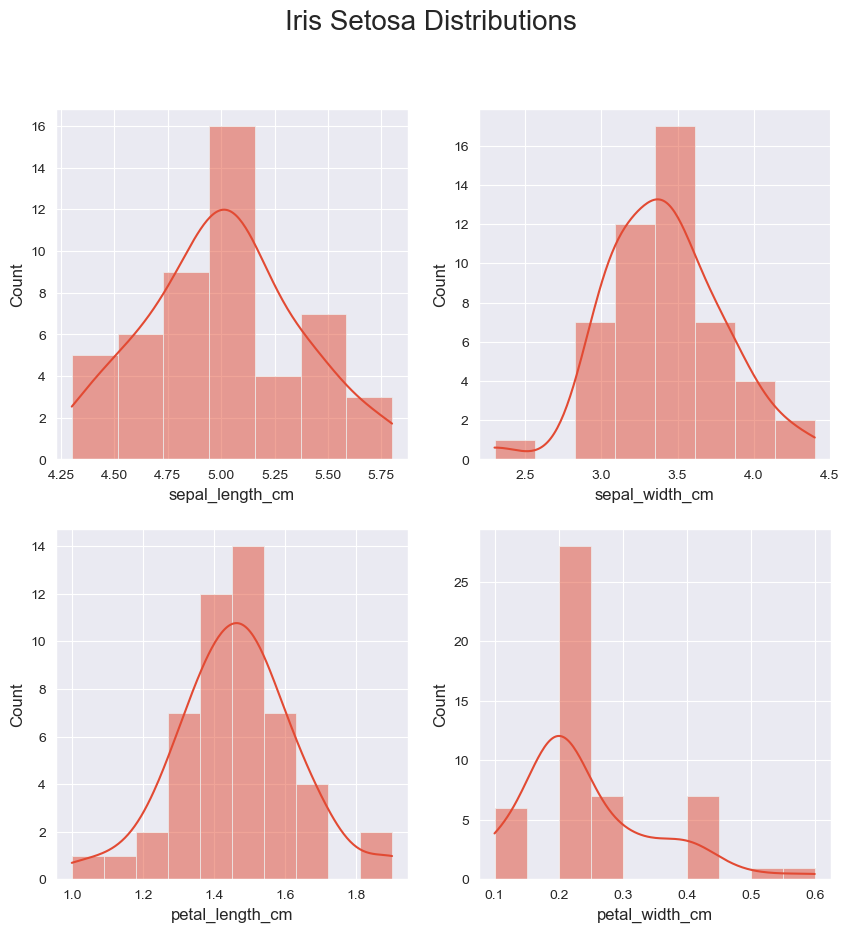

In [20]:
# Dataframe for Iris-setosa values only
setosa = iris[iris['class'] == 'Iris-setosa']

# Use matplotlib to plot and style the figure that will house the histogram axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
plt.style.use('ggplot')

# Setup the variables to be plotted and analysed in each axes. Use kde=True to add the Kernel Density Estimate
sns.histplot(data=setosa, x="sepal_length_cm", kde=True, ax=axes[0, 0])
sns.histplot(data=setosa, x="sepal_width_cm", kde=True, ax=axes[0, 1])
sns.histplot(data=setosa, x="petal_length_cm", kde=True, ax=axes[1, 0])
sns.histplot(data=setosa, x="petal_width_cm", kde=True, ax=axes[1, 1])

fig.suptitle('Iris Setosa Distributions', fontsize=20)

#### 3.2.2 Iris Versicolor Distributions

Text(0.5, 0.98, 'Iris Versicolor Distributions')

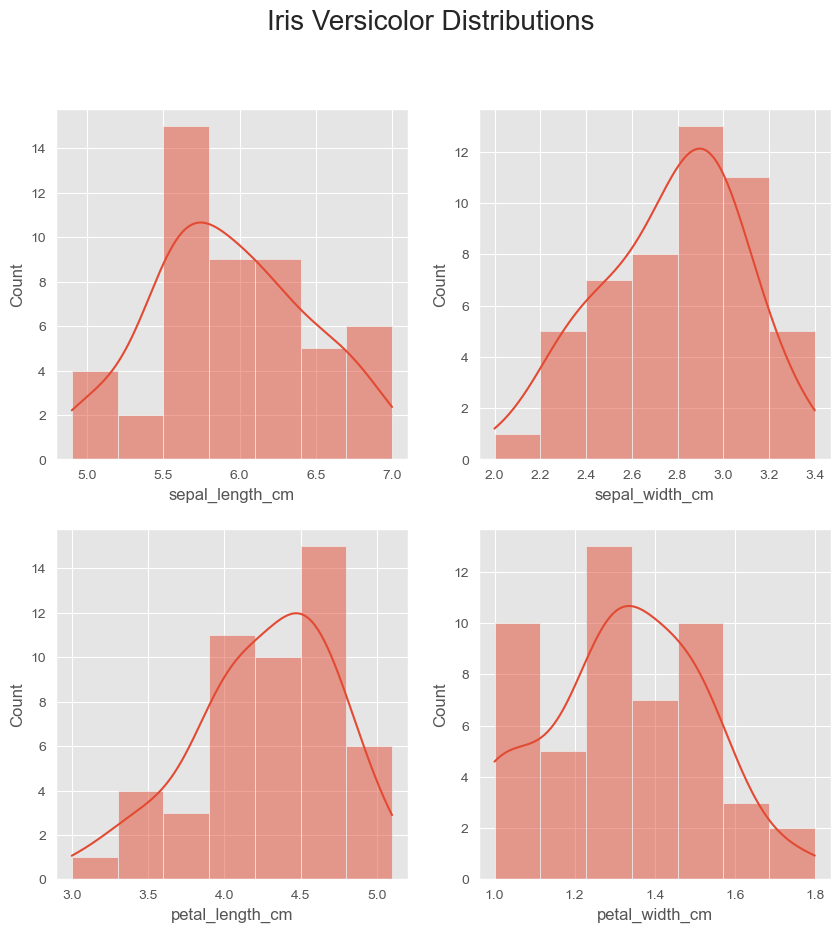

In [21]:
# Dataframe for Iris-versicolor values only
versicolor = iris[iris['class'] == 'Iris-versicolor']

# Use matplotlib to plot and style the figure that will house the histogram axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
plt.style.use('ggplot')

# Setup the variables to be plotted and analysed in each axes. Use kde=True to add the Kernel Density Estimate
sns.histplot(data=versicolor, x="sepal_length_cm", kde=True, ax=axes[0, 0])
sns.histplot(data=versicolor, x="sepal_width_cm", kde=True, ax=axes[0, 1])
sns.histplot(data=versicolor, x="petal_length_cm", kde=True, ax=axes[1, 0])
sns.histplot(data=versicolor, x="petal_width_cm", kde=True, ax=axes[1, 1])

fig.suptitle('Iris Versicolor Distributions', fontsize=20)

#### 3.2.3 Iris Virginica Distributions

Text(0.5, 0.98, 'Iris Virginica Distributions')

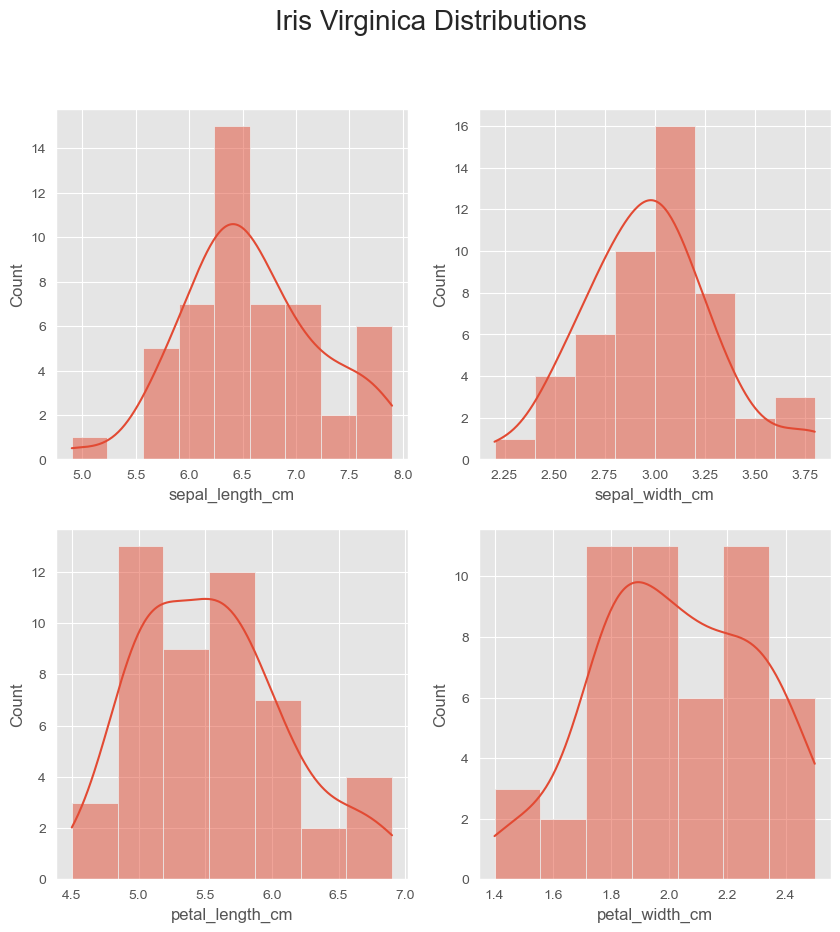

In [22]:
# Dataframe for Iris-virginica values only
virginica = iris[iris['class'] == 'Iris-virginica']

# Use matplotlib to plot and style the figure that will house the histogram axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
plt.style.use('ggplot')

# Setup the variables to be plotted and analysed in each axes. Use kde=True to add the Kernel Density Estimate
sns.histplot(data=virginica, x="sepal_length_cm", kde=True, ax=axes[0, 0])
sns.histplot(data=virginica, x="sepal_width_cm", kde=True, ax=axes[0, 1])
sns.histplot(data=virginica, x="petal_length_cm", kde=True, ax=axes[1, 0])
sns.histplot(data=virginica, x="petal_width_cm", kde=True, ax=axes[1, 1])

fig.suptitle('Iris Virginica Distributions', fontsize=20)

### 3.3 What can be inferred from the Species specific KDEs?

- For the most part, the KDEs at the individual species level reflect a normal distribution.   
- There are some exceptions to this, for example, the Setosa petal width which appears to have outliers skewing the KDE. However, due to the small measurements of the setosa petal widths (in milimeters), it is not significant.

## **4. Correlation Analysis**

***

### **4.1 What is Correlation Analysis?**   
Correlation measures the linear association between two variables. More information on correlation can be found [here](https://en.wikipedia.org/wiki/Correlation)  

The correlation coefficient has a value between -1 and 1 and it tells the strength and direction of a relationship between variables:   
- -1 indicates a perfectly negative linear correlation.   
-  0 indicates no linear correlation.   
- 1 indicates a perfectly positive linear correlation.    

There are four general categories under which the strength of a relationship between two variables is classified. They are: 
- A correlation coefficient of 0 to 0.25 signifies no relationship.   
- Between 0.25 and 0.5 signifies a weak relationship.   
- Between 0.5 and 0.75 signifies a moderate relationship. 
- Between 0.75 and 1 signifies a strong relationship.    
[Source: statology.org](https://www.statology.org/what-is-a-strong-correlation/)

### **4.2 Plotting Correlations**   
- The Seaborn pairplot functionality can be used to plot the correlations between all the measurement variables on one figure.   
- More information on Seaborn's pairplot functionality can be found [here](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

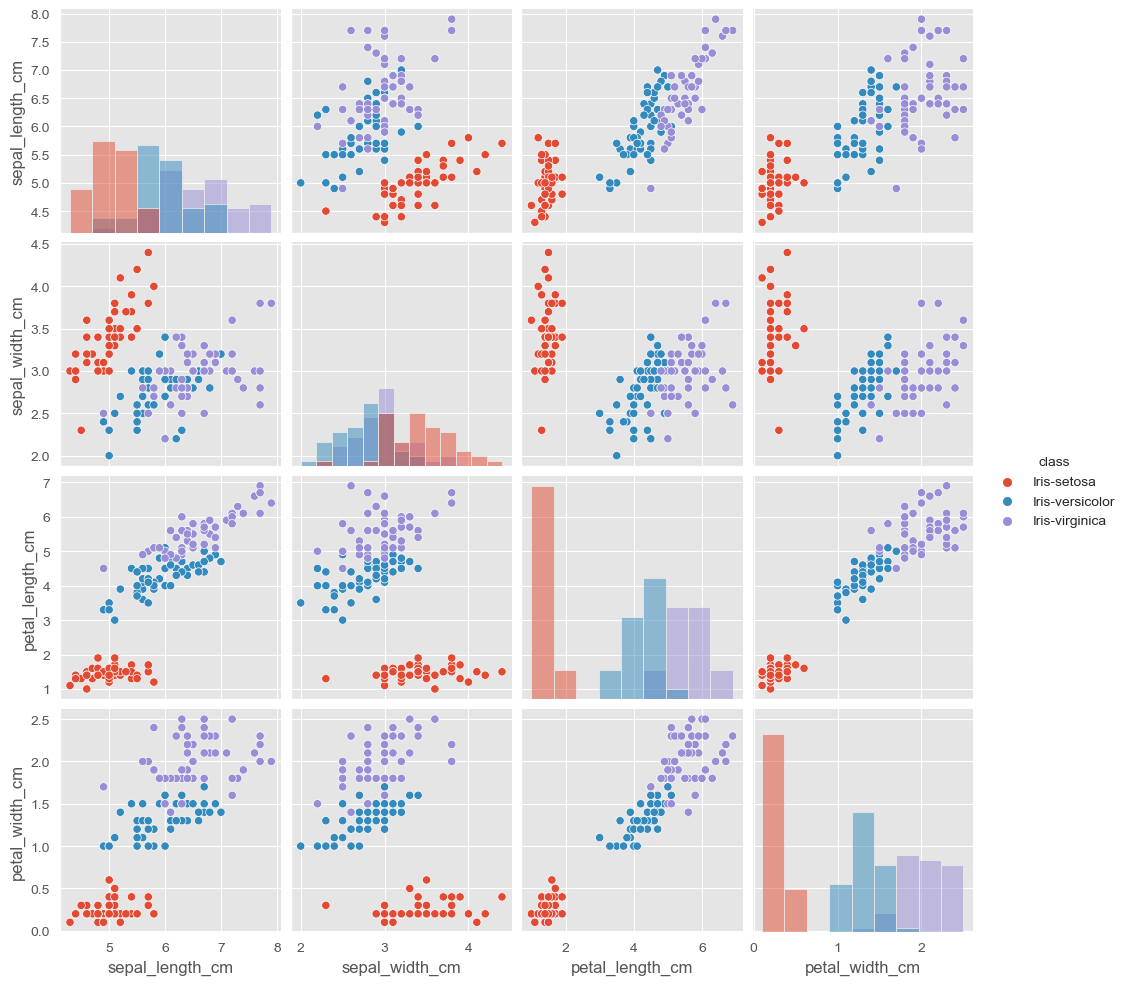

In [23]:
# Create a dataset with measurement variables and class(species)
measures = iris[
                ['class',
                'sepal_length_cm',
                'sepal_width_cm',
                'petal_length_cm',
                'petal_width_cm']
]

# Use Seaborn pairplot to plot the correlations
pairplot(measures, hue='class', diag_kind='hist')

#### 4.2.1 What can be inferred from the correlations above?

- It's clear that the Setosa species have the smallest measurements and that they are tightly bunched together.
- It's also obvious that the Setosa petal length and petal width measurements are close to each other.
- Positive correlation between petal length and petal width is clear between all three species.
- Positive correlation between petal length and sepal length is clear between versicolor and virginica species. 

### **4.3 Plotting a Line of Best Fit**   
- A line of best fit is a straight line drawn through a set of data points on a scatter plot that helps illustrate the relationship between those data points. Further details on lines of best fit can be found [here](https://www.geeksforgeeks.org/line-of-best-fit/).   
- For the Iris dataset, Seaborn can again be used to plot the line of best fit between the variables. 

#### 4.3.1 Apply a Line of Best Fit to two of the measurement variables

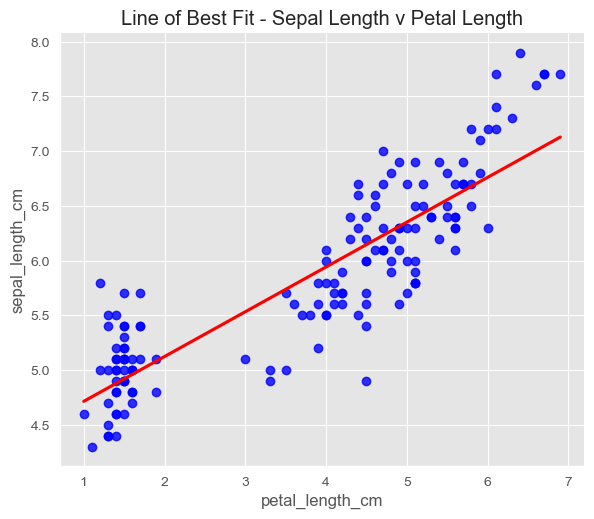

In [24]:
# Use Seaborn to plot lines of best fit between only two variables on the pairplot
sns.pairplot(iris, 
            # Set the y-axis variable as sepal length
             y_vars=['sepal_length_cm'], 
             # Set the x-axis variable as petal length
             x_vars=['petal_length_cm'], 
             # Seaborn regplot
             kind='reg', 
             height=5, 
             # Sets the ratio of the width to the height
             aspect=1.2,
             # Formats the colours and size of the line and scatter plot data points
             plot_kws={'ci' : None, 'color' : 'red',
                       'scatter_kws' : {'color' : 'blue'}}
             ).set(title='Line of Best Fit - Sepal Length v Petal Length')

#### 4.3.2 Apply Lines of Best Fit to all axes in the correlation figure

Text(0.5, 1.03, 'Lines of Best Fit')

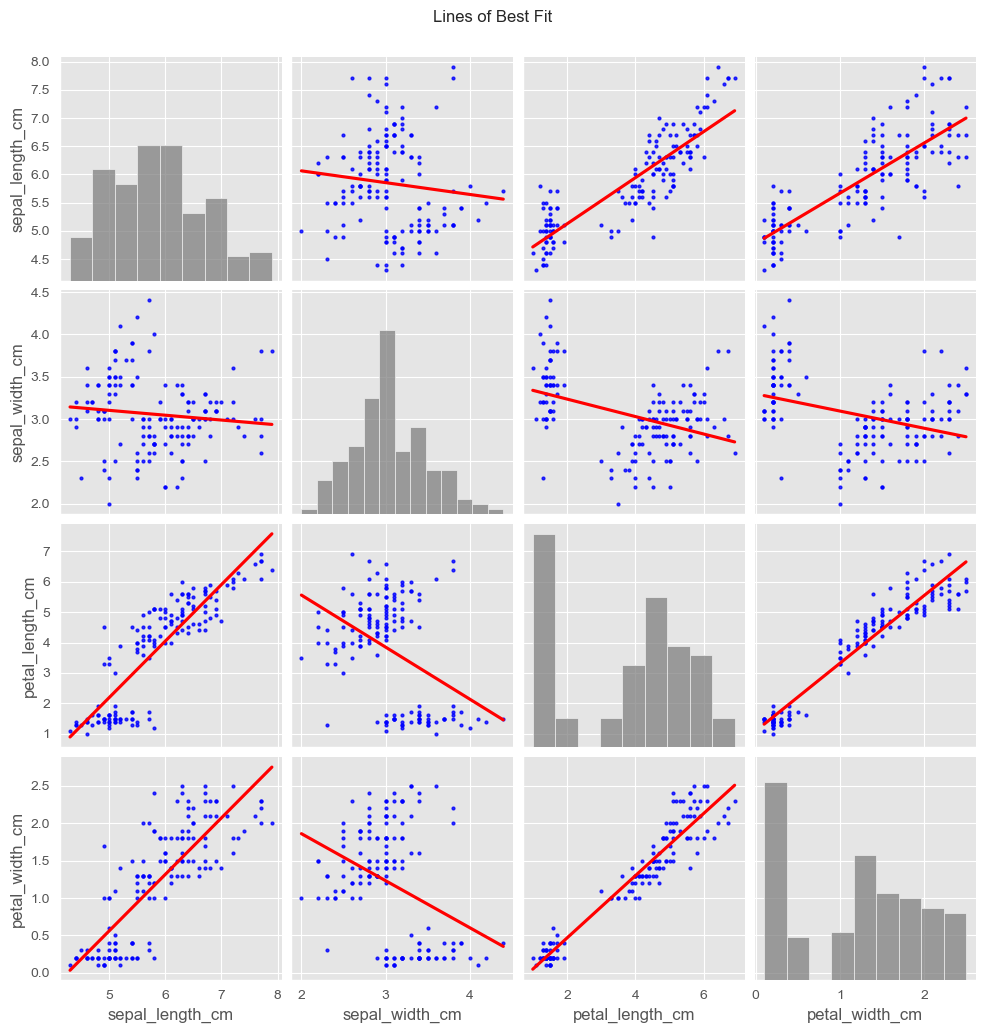

In [25]:
sns.pairplot(measures, 
            # reg is short for regplot and is used to apply the lines of best fit
            kind='reg', 
            height=2.5,
            # Sets the ratio of the width to the height
            aspect=1,
            # Formats the colours and size of the line and scatter plot data points
            plot_kws={'ci' : None, 'color' : 'red', 
                      'scatter_kws' : {'color' : 'blue', 's' : 4}
                      },
            # Sets the colour of the kernel density estimates in the diagonals
            diag_kws={'color' : 'grey'}
            ).fig.suptitle('Lines of Best Fit', y=1.03)

#### 4.3.3 What can be inferred from the lines of best fit?

- There are clear positive correlations between:
    - Sepal length and petal width.
    - Sepal length and petal length.
    - Petal length and petal width.

- There are clear negative correlations between:
    - Sepal width and petal width.
    - Sepal width and petal length.

- There are no clear correlations between:
    - Sepal width and sepal length.

### **4.4 Calculate Correlation Coefficients**

- The correlation coefficient is the measure between -1 and 1 that describes the direction and strength of a linear relationship between two variables.
- There are various ways to calculate the figure using Python.
- Below is how the figure is generated using numpy.corrcoef. More information on that can be found [here](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html)

#### 4.4.1 Petal Length v Petal Width Correlation

In [28]:
# Assign variables to petal length and petal width
plen = iris['petal_length_cm']
pwth = iris['petal_width_cm']

# Run numpy corrcoef functionality
np.corrcoef(plen, pwth)

array([[1.       , 0.9627571],
       [0.9627571, 1.       ]])

#### 4.4.2 What can be inferred from the Petal Length v Petal Width correlation?

- As per the classifications of the strength of correlations in section 4.1 above, a correlation coefficient of 0.96 signifies a positive, moderate relationship between petal length and petal width.
- The correlation coefficient can also be calculated for all the other correlations using Pandas corr() method. This generates a correlation matrix dataframe. More information [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

#### 4.4.3 Correlation Matrix for all measurement variables

In [ ]:
# Create a dataframe containing only the measurement variables
corr_matrix = iris[
                ['petal_length_cm',
                 'petal_width_cm',
                 'sepal_length_cm',
                 'sepal_width_cm']
]
# Apply the Pandas corr() method to generate corellation matrix dataframe 
corr = corr_matrix.corr()
# Display values
corr

,petal_length_cm,petal_width_cm,sepal_length_cm,sepal_width_cm
petal_length_cm,1.000000,0.962757,0.871754,-0.420516
petal_width_cm,0.962757,1.000000,0.817954,-0.356544
sepal_length_cm,0.871754,0.817954,1.000000,-0.109369
sepal_width_cm,-0.420516,-0.356544,-0.109369,1.000000


- The above correlation matrix can be made even clearer by generating a correlation heatmap using Seaborn.

### **4.4 Correlation Heatmap**

#### 4.4.1 What is a Correlation Heatmap?

- A correlation heatmap is a visual representation of the correlation matrix.
- Seaborn's heatmap() function can be used to generate the heatmap for the penguins correlations. More information on Seaborn's heatmap function [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html).
- This [webpage](https://www.geeksforgeeks.org/colormaps-in-seaborn-heatmaps/) provides further details on the color map options.

<Axes: >

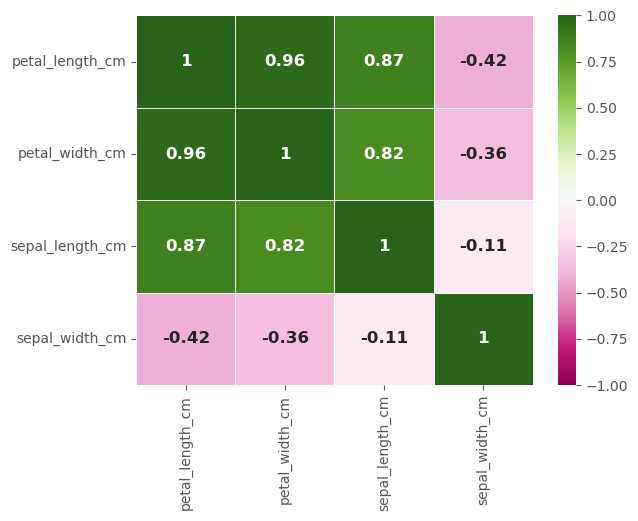

In [ ]:
# Generate correlation heatmap from correlation matrix in 5.4 above. 
sns.heatmap(corr, 
            # Set minimum value to minus 1
            vmin=-1,
            # Set maximum value to 1 
            vmax=1, 
            # Assign colours to the heatmap
            cmap='PiYG',
            # Assign values to each square in the heatmap 
            annot=True,
            # Format how values appear in each square of the heatmap
            annot_kws={'fontsize' : 12, 
                       'fontweight' : 'bold'
                       },
            # Create a white line between each square in the heatmap
            linewidth=0.5,
            )

#### 4.4.2 What can be inferred from the correlation heatmap?

- The heatmap mirrors what has already been reflected previously. For example, the green boxes show the positive correlations between:
    - Petal length and petal width - a strong correlation of 0.96.
    - Petal length and sepal length - a strong correlation of 0.87.
    - Petal width and sepal length - a strong correlation of 0.82.

- The red boxes show the negative correlations between:
    - Petal length and sepal width - a weak correlation of -0.42.
    - Petal width and sepal width - a weak correlation of -0.36.
    - Sepal length and sepal width - a correlation of -0.11 signifying no relationship.

## **5. Summary**

- Based on the above analysis, there isn't anything revelatory about the flowers contained in the Iris dataset. For the most part, the different flower meaurements follow a normal distribution, which is also evidenced by small standard deviations across all categories. In relation to correlations, the main points to note are that the longer the petal length, the longer the petal width and sepal width; and the longer the petal widt, the longer the sepal width.